<a href="https://colab.research.google.com/github/Siri2191/study_area/blob/main/Previsao_com_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

url = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv'
passageiros = pd.read_csv(url)

passageiros

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


In [ ]:
passageiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tempo        144 non-null    float64
 1   passageiros  144 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.4 KB


Text(0.5, 1.0, 'Serie temporal - das viagens de passageiros por ano')

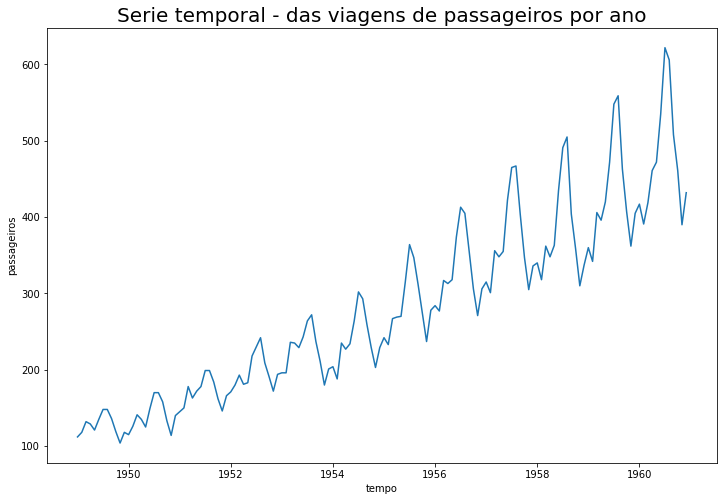

In [ ]:
plt.figure(figsize=(12,8))

sns.lineplot(x='tempo', y ='passageiros', data=passageiros)
plt.title('Serie temporal - das viagens de passageiros por ano', fontsize=20)

In [ ]:
sc = StandardScaler()
sc.fit(passageiros)

dados_escalados = sc.transform(passageiros)

In [ ]:
dados_escalados

array([[-1.72006415, -1.40777884],
       [-1.69600731, -1.35759023],
       [-1.67195047, -1.24048348],
       [-1.64789363, -1.26557778],
       [-1.62383679, -1.33249593],
       [-1.59977995, -1.21538918],
       [-1.5757231 , -1.10664719],
       [-1.55166626, -1.10664719],
       [-1.52760942, -1.20702441],
       [-1.50355258, -1.34922546],
       [-1.47949574, -1.47469699],
       [-1.4554389 , -1.35759023],
       [-1.43138206, -1.38268454],
       [-1.40732522, -1.29067209],
       [-1.38326837, -1.16520057],
       [-1.35921153, -1.21538918],
       [-1.33515469, -1.29903686],
       [-1.31109785, -1.09828242],
       [-1.28704101, -0.9226223 ],
       [-1.26298417, -0.9226223 ],
       [-1.23892733, -1.02299951],
       [-1.21487049, -1.23211871],
       [-1.19081364, -1.3910493 ],
       [-1.1667568 , -1.17356534],
       [-1.14269996, -1.1317415 ],
       [-1.11864312, -1.08991766],
       [-1.09458628, -0.85570415],
       [-1.07052944, -0.98117567],
       [-1.0464726 ,

In [ ]:
x = dados_escalados[:,0]
y = dados_escalados[:,1]

Text(0, 0.5, 'passageiros')

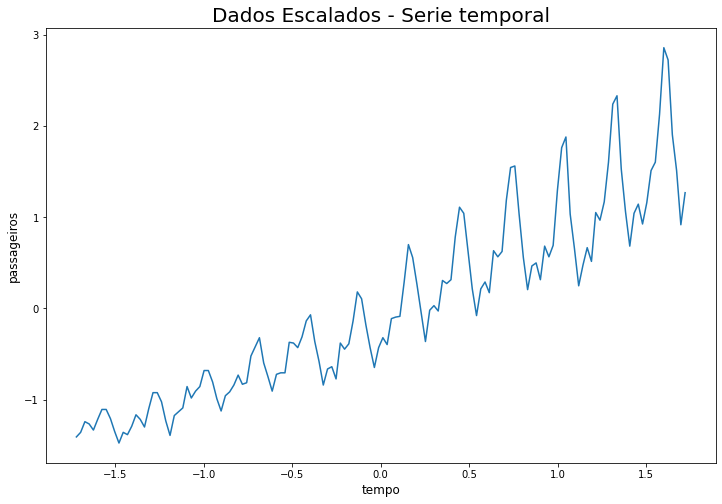

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x=x,y=y,data = dados_escalados)

plt.title('Dados Escalados - Serie temporal', fontsize=20)
plt.xlabel('tempo',fontsize=12)
plt.ylabel('passageiros',fontsize=12)

In [ ]:
len(dados_escalados)

144

In [ ]:
size_train = int(len(dados_escalados)*0.9)
size_test = int( len(dados_escalados)*0.1)

print('O tamanho dos dados de teste é : {} elementos'.format(size_test))
print('O tamanhao dos dados de treino é : {} elementos '.format(size_train))

O tamanho dos dados de teste é : 14 elementos
O tamanhao dos dados de treino é : 129 elementos 


In [ ]:
x_train = x[0:size_train]
x_test = x[size_train:len(dados_escalados)]

y_train = y[0:size_train]
y_test = y[size_train:len(dados_escalados)]

In [ ]:
y_test

array([1.05982773, 0.68341317, 1.04309819, 1.14347541, 0.92599144,
       1.16020494, 1.5115252 , 1.60353765, 2.13051803, 2.85825285,
       2.72441656, 1.9046693 , 1.5115252 , 0.91762667, 1.26894693])

Text(0, 0.5, 'passageiros')

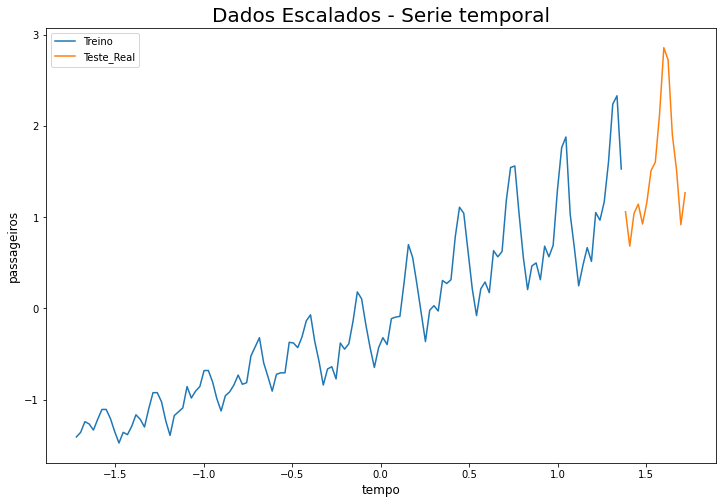

In [ ]:
plt.figure(figsize=(12,8))

sns.lineplot(x=x_train,y=y_train, label = 'Treino')
sns.lineplot(x=x_test,y=y_test, label='Teste_Real')

plt.title('Dados Escalados - Serie temporal', fontsize=20)
plt.xlabel('tempo',fontsize=12)
plt.ylabel('passageiros',fontsize=12)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(Dense(1,input_dim=1,kernel_initializer='Ones',activation ='linear',use_bias = False))

In [ ]:
regressor.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [ ]:
regressor.fit(x_train,y_train)

5/5 [==============================] - 1s 6ms/step - loss: 0.1284


In [ ]:
y_predict = regressor.predict(x_train)

5/5 [==============================] - 0s 8ms/step


In [ ]:
y_predict[1:5,0]

array([-1.6881763, -1.6642305, -1.6402847, -1.6163388], dtype=float32)

Text(0, 0.5, 'passageiros')

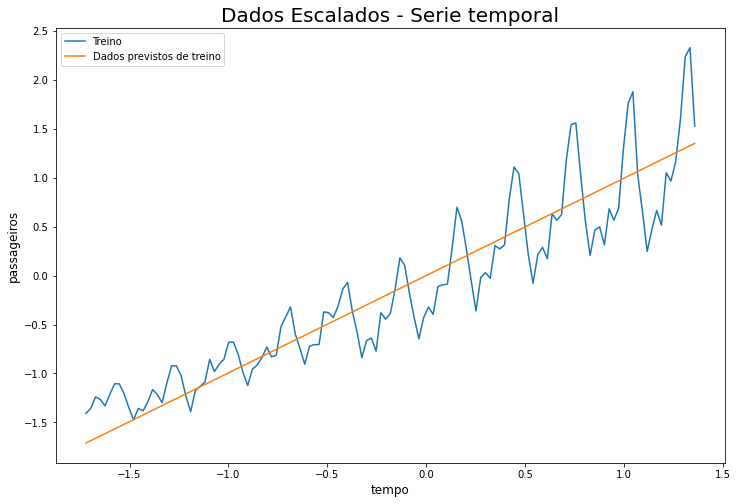

In [ ]:
plt.figure(figsize=(12,8))

sns.lineplot(x=x_train,y=y_train, label = 'Treino')
sns.lineplot(x=x_train,y=y_predict[:,0], label='Dados previstos de treino')

plt.title('Dados Escalados - Serie temporal', fontsize=20)
plt.xlabel('tempo',fontsize=12)
plt.ylabel('passageiros',fontsize=12)

In [ ]:
d= {'tempo':x_train,'passageiros':y_predict[:,0]}
resultados = pd.DataFrame(d)
resultados

,tempo,passageiros
0,-1.720064,-1.712122
1,-1.696007,-1.688176
2,-1.671950,-1.664230
3,-1.647894,-1.640285
4,-1.623837,-1.616339
...,...,...
124,1.262984,1.257152
125,1.287041,1.281098
126,1.311098,1.305044
127,1.335155,1.328990


In [ ]:
resultados_transf = sc.inverse_transform(resultados)
resultados_transf = pd.DataFrame(resultados_transf)
resultados_transf.columns = ['tempo','passageiro']
resultados_transf

,tempo,passageiro
0,1949.000000,75.616071
1,1949.083333,78.478756
2,1949.166667,81.341454
3,1949.250000,84.204152
4,1949.333333,87.066851
...,...,...
124,1959.333333,430.589980
125,1959.416667,433.452679
126,1959.500000,436.315377
127,1959.583333,439.178061


In [ ]:
y_predict_test = regressor.predict(x_test)
d= {'tempo':x_test,'passageiros':y_predict_test[:,0]}
resultados_test = pd.DataFrame(d)
resultados_transf_test = sc.inverse_transform(resultados_test)
resultados_transf_test = pd.DataFrame(resultados_transf_test)
resultados_transf_test.columns = ['tempo','passageiro']
resultados_transf

1/1 [==============================] - 0s 50ms/step


,tempo,passageiro
0,1949.000000,75.616071
1,1949.083333,78.478756
2,1949.166667,81.341454
3,1949.250000,84.204152
4,1949.333333,87.066851
...,...,...
124,1959.333333,430.589980
125,1959.416667,433.452679
126,1959.500000,436.315377
127,1959.583333,439.178061


Text(0, 0.5, 'passageiros')

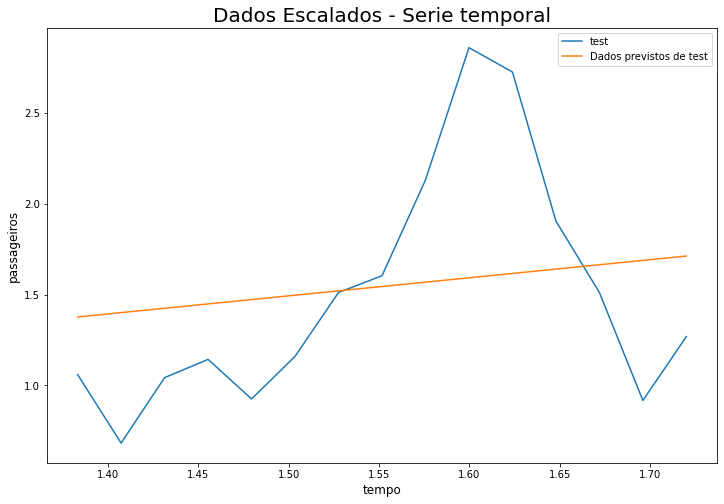

In [ ]:
plt.figure(figsize=(12,8))

sns.lineplot(x=x_test,y=y_test, label = 'test')
sns.lineplot(x=x_test,y=y_predict_test[:,0], label='Dados previstos de test')

plt.title('Dados Escalados - Serie temporal', fontsize=20)
plt.xlabel('tempo',fontsize=12)
plt.ylabel('passageiros',fontsize=12)

Text(0, 0.5, 'passageiros')

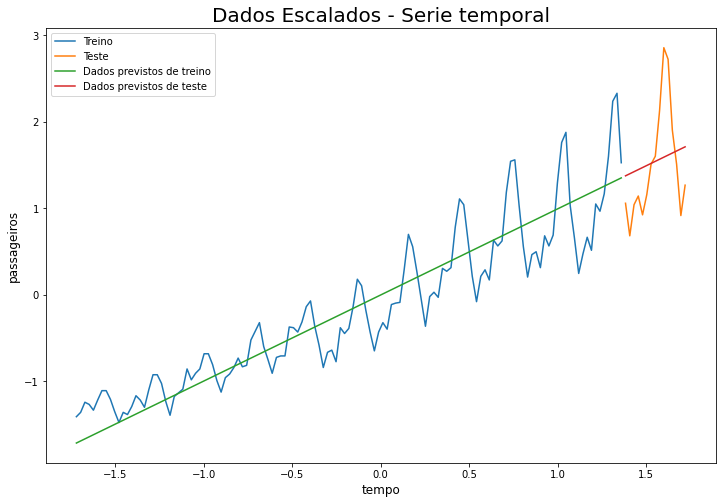

In [ ]:
plt.figure(figsize=(12,8))


sns.lineplot(x=x_train,y=y_train, label = 'Treino')
sns.lineplot(x=x_test,y=y_test, label = 'Teste')
sns.lineplot(x=x_train,y=y_predict[:,0], label='Dados previstos de treino')
sns.lineplot(x=x_test,y=y_predict_test[:,0], label='Dados previstos de teste')

plt.title('Dados Escalados - Serie temporal', fontsize=20)
plt.xlabel('tempo',fontsize=12)
plt.ylabel('passageiros',fontsize=12)

In [ ]:
regressor2 = Sequential()

In [ ]:
regressor2.add(Dense(8,input_dim=1,kernel_initializer = 'random_uniform',
                    activation ='linear',use_bias=False))
regressor2.add(Dense(8,kernel_initializer = 'random_uniform',
                    activation ='linear',use_bias=False))
regressor2.add(Dense(1,kernel_initializer = 'random_uniform',
                    activation ='linear',use_bias=False))

In [ ]:
regressor2.compile(loss='mean_squared_error', optimizer = 'adam')

In [ ]:
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [ ]:
regressor2.fit(x_train,y_train, epochs = 200)

Epoch 1/200
5/5 [==============================] - 1s 9ms/step - loss: 0.8094
Epoch 2/200
5/5 [==============================] - 0s 7ms/step - loss: 0.8090
Epoch 3/200
5/5 [==============================] - 0s 5ms/step - loss: 0.8083
Epoch 4/200
5/5 [==============================] - 0s 13ms/step - loss: 0.8074
Epoch 5/200
5/5 [==============================] - 0s 6ms/step - loss: 0.8060
Epoch 6/200
5/5 [==============================] - 0s 8ms/step - loss: 0.8039
Epoch 7/200
5/5 [==============================] - 0s 5ms/step - loss: 0.8013
Epoch 8/200
5/5 [==============================] - 0s 8ms/step - loss: 0.7975
Epoch 9/200
5/5 [==============================] - 0s 8ms/step - loss: 0.7926
Epoch 10/200
5/5 [==============================] - 0s 8ms/step - loss: 0.7867
Epoch 11/200
5/5 [==============================] - 0s 12ms/step - loss: 0.7786
Epoch 12/200
5/5 [==============================] - 0s 7ms/step - loss: 0.7687
Epoch 13/200
5/5 [==============================] - 0s 21ms

In [ ]:
y_predict = regressor2.predict(x_train)
y_predict_test = regressor2.predict(x_test)

1/1 [==============================] - 0s 34ms/step


Text(0, 0.5, 'passageiros')

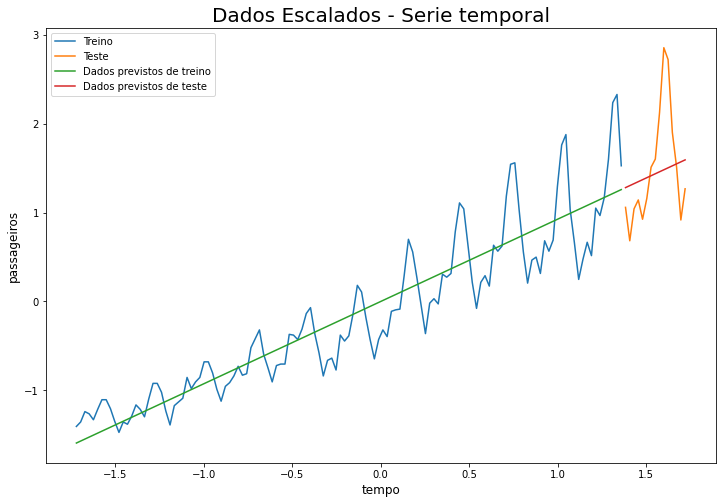

In [ ]:
plt.figure(figsize=(12,8))


sns.lineplot(x=x_train,y=y_train, label = 'Treino')
sns.lineplot(x=x_test,y=y_test, label = 'Teste')
sns.lineplot(x=x_train,y=y_predict[:,0], label='Dados previstos de treino')
sns.lineplot(x=x_test,y=y_predict_test[:,0], label='Dados previstos de teste')

plt.title('Dados Escalados - Serie temporal', fontsize=20)
plt.xlabel('tempo',fontsize=12)
plt.ylabel('passageiros',fontsize=12)

In [ ]:
regressor3 = Sequential()

regressor3.add(Dense(8,input_dim=1,kernel_initializer = 'random_uniform',
                    activation ='sigmoid',use_bias=False))
regressor3.add(Dense(8,kernel_initializer = 'random_uniform',
                    activation ='sigmoid',use_bias=False))
regressor3.add(Dense(1,kernel_initializer = 'random_uniform',
                    activation ='sigmoid',use_bias=False))

regressor3.compile(loss='mean_squared_error', optimizer ='adam')

In [ ]:
regressor3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 8)                 8         
                                                                 
 dense_6 (Dense)             (None, 8)                 64        
                                                                 
 dense_7 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [ ]:
regressor3.fit(x_train,y_train, epochs = 500)

Epoch 1/500
5/5 [==============================] - 2s 12ms/step - loss: 1.2196
Epoch 2/500
5/5 [==============================] - 0s 6ms/step - loss: 1.2132
Epoch 3/500
5/5 [==============================] - 0s 8ms/step - loss: 1.2069
Epoch 4/500
5/5 [==============================] - 0s 12ms/step - loss: 1.2009
Epoch 5/500
5/5 [==============================] - 0s 8ms/step - loss: 1.1959
Epoch 6/500
5/5 [==============================] - 0s 7ms/step - loss: 1.1918
Epoch 7/500
5/5 [==============================] - 0s 6ms/step - loss: 1.1870
Epoch 8/500
5/5 [==============================] - 0s 5ms/step - loss: 1.1826
Epoch 9/500
5/5 [==============================] - 0s 7ms/step - loss: 1.1779
Epoch 10/500
5/5 [==============================] - 0s 7ms/step - loss: 1.1729
Epoch 11/500
5/5 [==============================] - 0s 5ms/step - loss: 1.1674
Epoch 12/500
5/5 [==============================] - 0s 7ms/step - loss: 1.1612
Epoch 13/500
5/5 [==============================] - 0s 7ms/

In [ ]:
y_predict =  regressor3.predict(x_train)
y_predict_test = regressor3.predict(x_test)

1/1 [==============================] - 0s 34ms/step


Text(0, 0.5, 'passageiros')

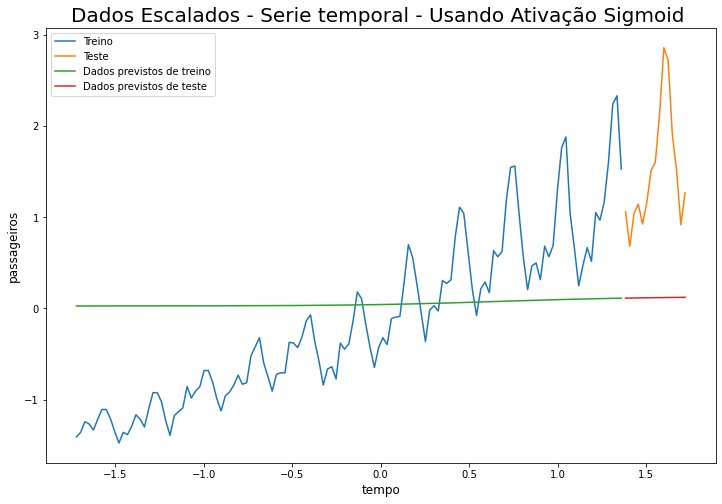

In [ ]:
plt.figure(figsize=(12,8))


sns.lineplot(x=x_train,y=y_train, label = 'Treino')
sns.lineplot(x=x_test,y=y_test, label = 'Teste')
sns.lineplot(x=x_train,y=y_predict[:,0], label='Dados previstos de treino')
sns.lineplot(x=x_test,y=y_predict_test[:,0], label='Dados previstos de teste')

plt.title('Dados Escalados - Serie temporal - Usando Ativação Sigmoid ', fontsize=20)
plt.xlabel('tempo',fontsize=12)
plt.ylabel('passageiros',fontsize=12)

In [ ]:
import numpy as np

vetor = pd.DataFrame(y_train)[0]



In [ ]:
vetor

0     -1.407779
1     -1.357590
2     -1.240483
3     -1.265578
4     -1.332496
         ...   
124    1.168570
125    1.603538
126    2.239260
127    2.331272
128    1.528255
Name: 0, Length: 129, dtype: float64

In [ ]:
def separa_dados(vetor,n_passos):
  x_novo,y_novo = [], []

  for i in range(n_passos,vetor.shape[0]):
    x_novo.append(list(vetor.loc[i -n_passos: i-1]))
    y_novo.append(vetor.loc[i])
  
  x_novo, y_novo = np.array(x_novo), np.array(y_novo)

  return x_novo, y_novo

In [ ]:
x_train_new, y_train_new = separa_dados(vetor,1)

In [ ]:
x_train_new[0:7]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593],
       [-1.21538918],
       [-1.10664719]])

In [ ]:
y_train_new[0:7]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918,
       -1.10664719, -1.10664719])

In [ ]:
vetor2 = pd.DataFrame(y_test)[0]

x_test_new, y_test_new =  separa_dados(vetor2,1)

In [ ]:
x_test_new[0:5]

array([[1.05982773],
       [0.68341317],
       [1.04309819],
       [1.14347541],
       [0.92599144]])

In [ ]:
y_test_new[0:5]

array([0.68341317, 1.04309819, 1.14347541, 0.92599144, 1.16020494])

In [ ]:
regressor4 = Sequential()

regressor4.add(Dense(8,input_dim=1,kernel_initializer = 'ones',
                    activation ='linear',use_bias=False))
regressor4.add(Dense(64,kernel_initializer = 'random_uniform',
                    activation ='sigmoid',use_bias=False))
regressor4.add(Dense(1,kernel_initializer = 'random_uniform',
                    activation ='linear',use_bias=False))

regressor4.compile(loss='mean_squared_error', optimizer ='adam')

In [ ]:
regressor4.fit(x_train_new,y_train_new,epochs = 100)

Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8342
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7755
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7416
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7194
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7029
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6825
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6574
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6315
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6071
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5770
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5459
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5120
Epoch 13/100
4/4 [==============================] - 0s 3ms/st

In [ ]:
y_predict_new = regressor4.predict(x_train_new)

y_predict_new_test = regressor4.predict(x_test_new)

1/1 [==============================] - 0s 89ms/step


Text(0, 0.5, 'passageiros')

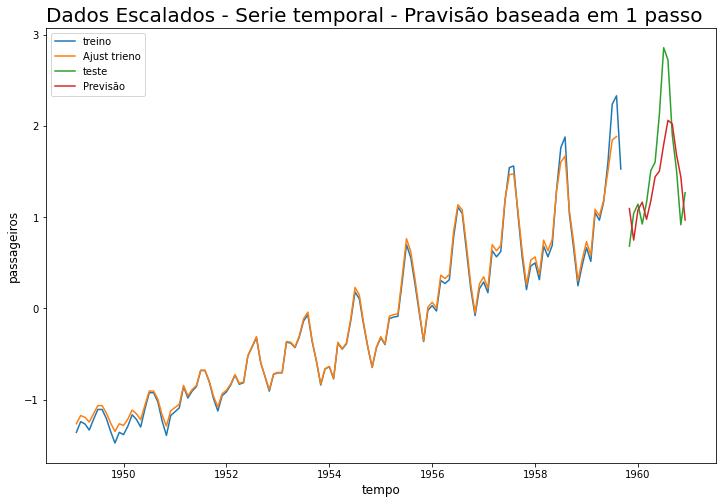

In [ ]:
plt.figure(figsize=(12,8))

sns.lineplot(x='tempo', y = y_train_new, data= passageiros[1:129], label = 'treino')
sns.lineplot(x='tempo', y = pd.DataFrame(y_predict_new)[0], data = passageiros[1:129], label ='Ajust trieno')
sns.lineplot(x='tempo',y = y_test_new, data = passageiros[130:144], label = 'teste' )
sns.lineplot(x='tempo', y = pd.DataFrame(y_predict_new_test)[0].values, data = passageiros[130:144], label = 'Previsão')


plt.title('Dados Escalados - Serie temporal - Pravisão baseada em 1 passo  ', fontsize=20)
plt.xlabel('tempo',fontsize=12)
plt.ylabel('passageiros',fontsize=12)

In [ ]:
x_train_new, y_train_new = separa_dados(vetor,4)

x_train_new[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [ ]:
y_train_new[0:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [ ]:
x_test_new , y_test_new = separa_dados(vetor2,4)

In [ ]:
regressor5 = Sequential()

regressor5.add(Dense(8,input_dim=4,kernel_initializer = 'ones',
                    activation ='linear',use_bias=False))
regressor5.add(Dense(64,kernel_initializer = 'random_uniform',
                    activation ='sigmoid',use_bias=False))
regressor5.add(Dense(1,kernel_initializer = 'random_uniform',
                    activation ='linear',use_bias=False))

regressor5.compile(loss='mean_squared_error', optimizer ='adam')

In [ ]:
regressor5.fit(x_train_new,y_train_new, epochs = 300 )


Epoch 1/300
4/4 [==============================] - 1s 7ms/step - loss: 0.8336
Epoch 2/300
4/4 [==============================] - 0s 7ms/step - loss: 0.7208
Epoch 3/300
4/4 [==============================] - 0s 7ms/step - loss: 0.6383
Epoch 4/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5755
Epoch 5/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5153
Epoch 6/300
4/4 [==============================] - 0s 8ms/step - loss: 0.4537
Epoch 7/300
4/4 [==============================] - 0s 8ms/step - loss: 0.3931
Epoch 8/300
4/4 [==============================] - 0s 10ms/step - loss: 0.3361
Epoch 9/300
4/4 [==============================] - 0s 5ms/step - loss: 0.2860
Epoch 10/300
4/4 [==============================] - 0s 6ms/step - loss: 0.2387
Epoch 11/300
4/4 [==============================] - 0s 8ms/step - loss: 0.2039
Epoch 12/300
4/4 [==============================] - 0s 5ms/step - loss: 0.1786
Epoch 13/300
4/4 [==============================] - 0s 5ms/s

In [ ]:
y_predict_new = regressor5.predict(x_train_new)
y_predict_new_test = regressor5.predict(x_test_new)

1/1 [==============================] - 0s 27ms/step


Text(0, 0.5, 'passageiros')

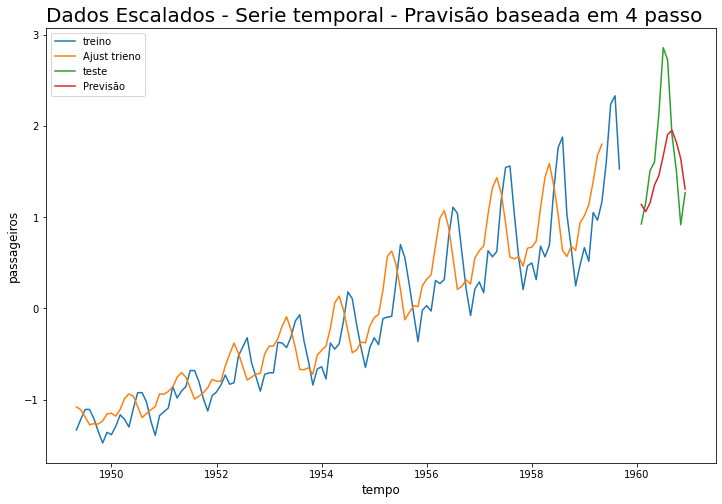

In [ ]:
plt.figure(figsize=(12,8))

sns.lineplot(x='tempo', y = y_train_new, data= passageiros[4:129], label = 'treino')
sns.lineplot(x='tempo', y = pd.DataFrame(y_predict_new)[0], data = passageiros[4:129], label ='Ajust trieno')
sns.lineplot(x='tempo',y = y_test_new, data = passageiros[133:144], label = 'teste' )
sns.lineplot(x='tempo', y = pd.DataFrame(y_predict_new_test)[0].values, data = passageiros[133:144], label = 'Previsão')


plt.title('Dados Escalados - Serie temporal - Pravisão baseada em 4 passo  ', fontsize=20)
plt.xlabel('tempo',fontsize=12)
plt.ylabel('passageiros',fontsize=12)

In [ ]:
bike = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv')

In [ ]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
bike['datas']=pd.to_datetime(bike['datas'])

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

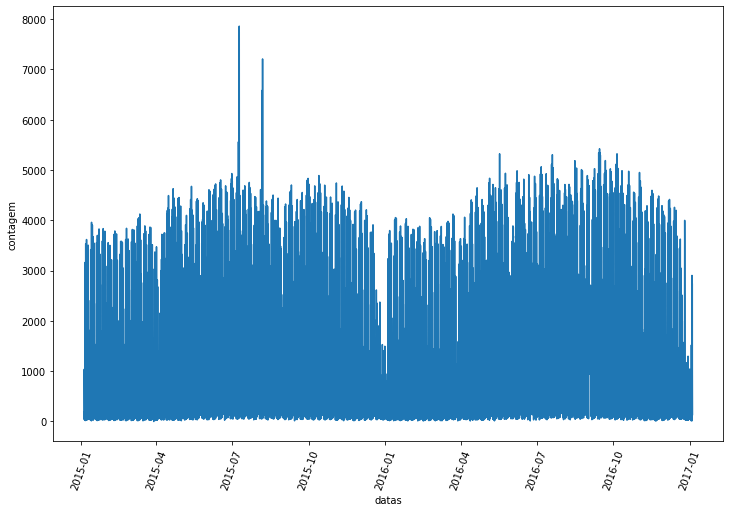

In [ ]:
plt.figure(figsize=(12,8))

sns.lineplot(x='datas',y='contagem', data=bike)
plt.xticks(rotation=70)

In [ ]:
sc2 = StandardScaler()
sc2.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler()

In [ ]:
y = sc2.transform(bike['contagem'].values.reshape(-1,1))

In [ ]:
tamanho_treino = int(len(bike)*0.9)
tamanho_teste = len(bike)- tamanho_treino

y_train = y[0:tamanho_treino]
y_test = y[tamanho_treino:len(bike)]

Text(0, 0.5, 'contagem (normalizado)')

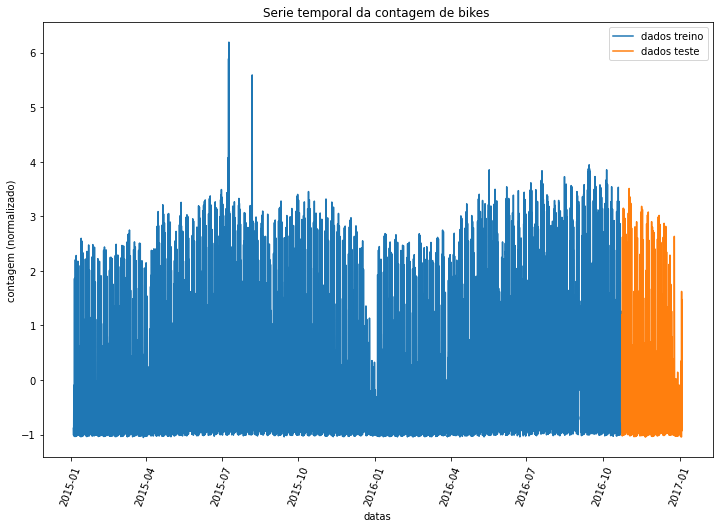

In [ ]:
plt.figure(figsize=(12,8))

sns.lineplot(x='datas', y=y_train[:,0], data = bike[:tamanho_treino], label = 'dados treino' )
sns.lineplot(x='datas', y=y_test[:,0], data = bike[tamanho_treino:len(bike)], label = 'dados teste' )

plt.xticks(rotation=70)

plt.title('Serie temporal da contagem de bikes ', fontsize=12)
plt.ylabel('contagem (normalizado)')


In [ ]:
vetor = pd.DataFrame(y_train)[0]

x_train_new, y_train_new = separa_dados(vetor,10)



In [ ]:
vetor2 = pd.DataFrame(vetor2)[0]

x_test_new, y_test_new = separa_dados(vetor2,10)

In [ ]:
x_train_new = x_train_new.reshape((x_train_new.shape[0],x_train_new.shape[1],1))

In [ ]:
x_test_new = x_test_new.reshape((x_test_new.shape[0],x_test_new.shape[1],1))

In [ ]:
from tensorflow.keras.layers  import LSTM

recorrente = Sequential()

recorrente.add(LSTM(128,input_shape=(x_train_new.shape[1],x_train_new.shape[2])))
recorrente.add(Dense(units=1))

recorrente.compile(loss='mean_squared_error', optimizer ='RMSprop' )

recorrente.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_24 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
resultado = recorrente.fit(x_train_new, y_train_new, validation_data = (x_test_new,y_test_new), epochs =100)

Epoch 1/100
490/490 [==============================] - 11s 19ms/step - loss: 0.2854 - val_loss: 0.2024
Epoch 2/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0830 - val_loss: 0.2408
Epoch 3/100
490/490 [==============================] - 8s 17ms/step - loss: 0.0555 - val_loss: 0.1794
Epoch 4/100
490/490 [==============================] - 9s 17ms/step - loss: 0.0477 - val_loss: 0.1595
Epoch 5/100
490/490 [==============================] - 10s 21ms/step - loss: 0.0434 - val_loss: 0.1867
Epoch 6/100
490/490 [==============================] - 15s 31ms/step - loss: 0.0411 - val_loss: 0.2441
Epoch 7/100
490/490 [==============================] - 9s 19ms/step - loss: 0.0386 - val_loss: 0.2265
Epoch 8/100
490/490 [==============================] - 12s 25ms/step - loss: 0.0369 - val_loss: 0.2274
Epoch 9/100
490/490 [==============================] - 14s 28ms/step - loss: 0.0356 - val_loss: 0.1737
Epoch 10/100
490/490 [==============================] - 12s 25ms/step - loss:

In [ ]:
y_ajustado = recorrente.predict(x_train_new)



490/490 [==============================] - 4s 7ms/step


1/1 [==============================] - 0s 39ms/step


ValueError: ignored

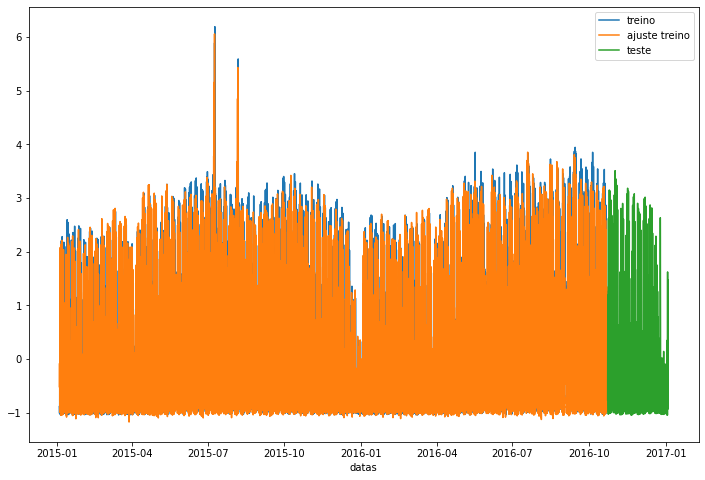

In [ ]:
y_predito = recorrente.predict(x_test_new)


plt.figure(figsize=(12,8))

sns.lineplot(x='datas', y =  y_train[:,0], data = bike[0:tamanho_treino], label = 'treino')
sns.lineplot(x='datas', y = y_ajustado[:,0], data = bike[0:15662], label='ajuste treino')
sns.lineplot(x='datas',y = y_test[:,0], data = bike[tamanho_treino:len(bike)], label =  'teste')
sns.lineplot(x='datas',y = y_predito[:,0], data = bike[tamanho_treino + 10:len(bike)], label =  'ajustado teste')
 

